In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/content/Plant_1_Generation_Data.csv")

# Show first 5 rows
df.head()



,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [ ]:
# Check shape and info
print("Number of rows and columns:", df.shape)
print(df.info())

# Check for missing values
print(df.isnull().sum())


Number of rows and columns: (68778, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB
None
DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64


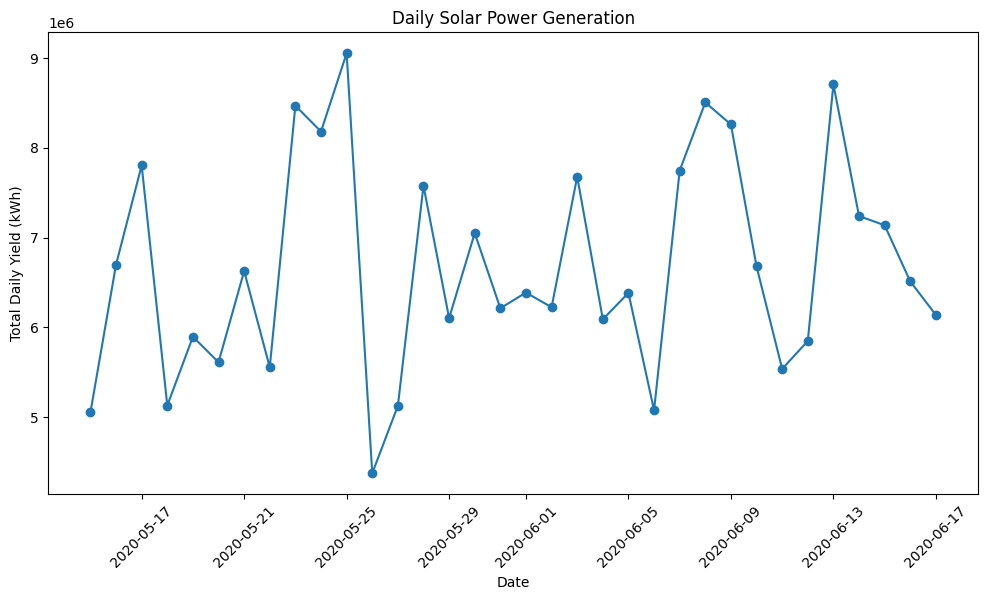

In [ ]:
import matplotlib.pyplot as plt

# Convert DATE_TIME column to datetime
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%d-%m-%Y %H:%M')

# Group by date to get total daily yield
df_daily = df.groupby(df['DATE_TIME'].dt.date)['DAILY_YIELD'].sum()

# Plot daily solar power
plt.figure(figsize=(12,6))
plt.plot(df_daily.index, df_daily.values, marker='o')
plt.title("Daily Solar Power Generation")
plt.xlabel("Date")
plt.ylabel("Total Daily Yield (kWh)")
plt.xticks(rotation=45)
plt.show()


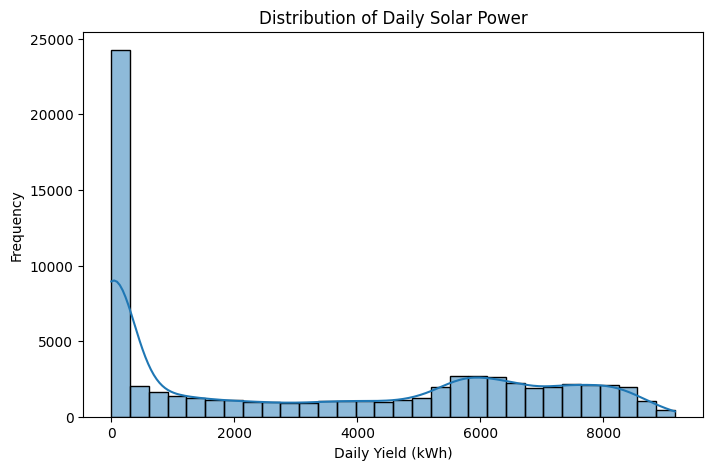

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['DAILY_YIELD'], bins=30, kde=True)
plt.title("Distribution of Daily Solar Power")
plt.xlabel("Daily Yield (kWh)")
plt.ylabel("Frequency")
plt.show()


- Solar power generation varies day to day depending on weather.
- Peak generation occurs on sunny days, while zero or low generation happens at night.
- Most daily yields are within a certain range, as seen in the histogram.
